# Blazars features extractions

In [1]:
import itertools as it

import numpy as np

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from IPython import display as d

In [2]:
df = pd.read_csv("blazars/bla_features.csv", skiprows=1,
                 names=["feature", "b356", "b216", "b206", "b360"]).set_index("feature")
df.head()

,b356,b216,b206,b360
feature,,,,
Amplitude,5.784123e-01,1.800164e+00,1.072769e+00,1.604043e+00
Autocor_length,1.000000e+00,7.000000e+00,3.000000e+00,2.000000e+00
Con,0.000000e+00,0.000000e+00,2.380952e-02,0.000000e+00
Eta_e,1.248916e+07,4.989453e+06,2.007670e+07,9.447507e+06
FluxPercentileRatioMid20,9.146439e-02,1.525788e-01,4.147941e-02,1.820627e-02


In [3]:
no_feats = ['id', 'vs_catalog', 'vs_type', 'ra_k', 'dec_k', "cnt", "scls_k", "scls_j", "scls_h",]
path = "cone_search/gema_{tile}_sample.pkl.bz2"

def plot_in_tile(tile):
    tdf = pd.read_pickle(path.format(tile=tile))
    tdf = tdf.replace([np.inf, -np.inf], np.nan)
    
    d.display(d.Markdown(f"## Tile {tile}"))
    d.display(d.Markdown(f"### Cone search sample: {len(tdf)}"))
    
    feats = [c for c in tdf.columns if c not in no_feats and c in df.index]
    
    axes = tdf[feats].hist(figsize=(30, 30))
    axes = {ax.title.get_text(): ax for ax in it.chain(*axes)}
    
    blz = df[tile]
    for c in feats:
        ax = axes[c]
        v = blz.get(c)
        if v:
            ax.axvline(v, color="r", linewidth=4)
    plt.plot()

## Tile b356

### Cone search sample: 11054

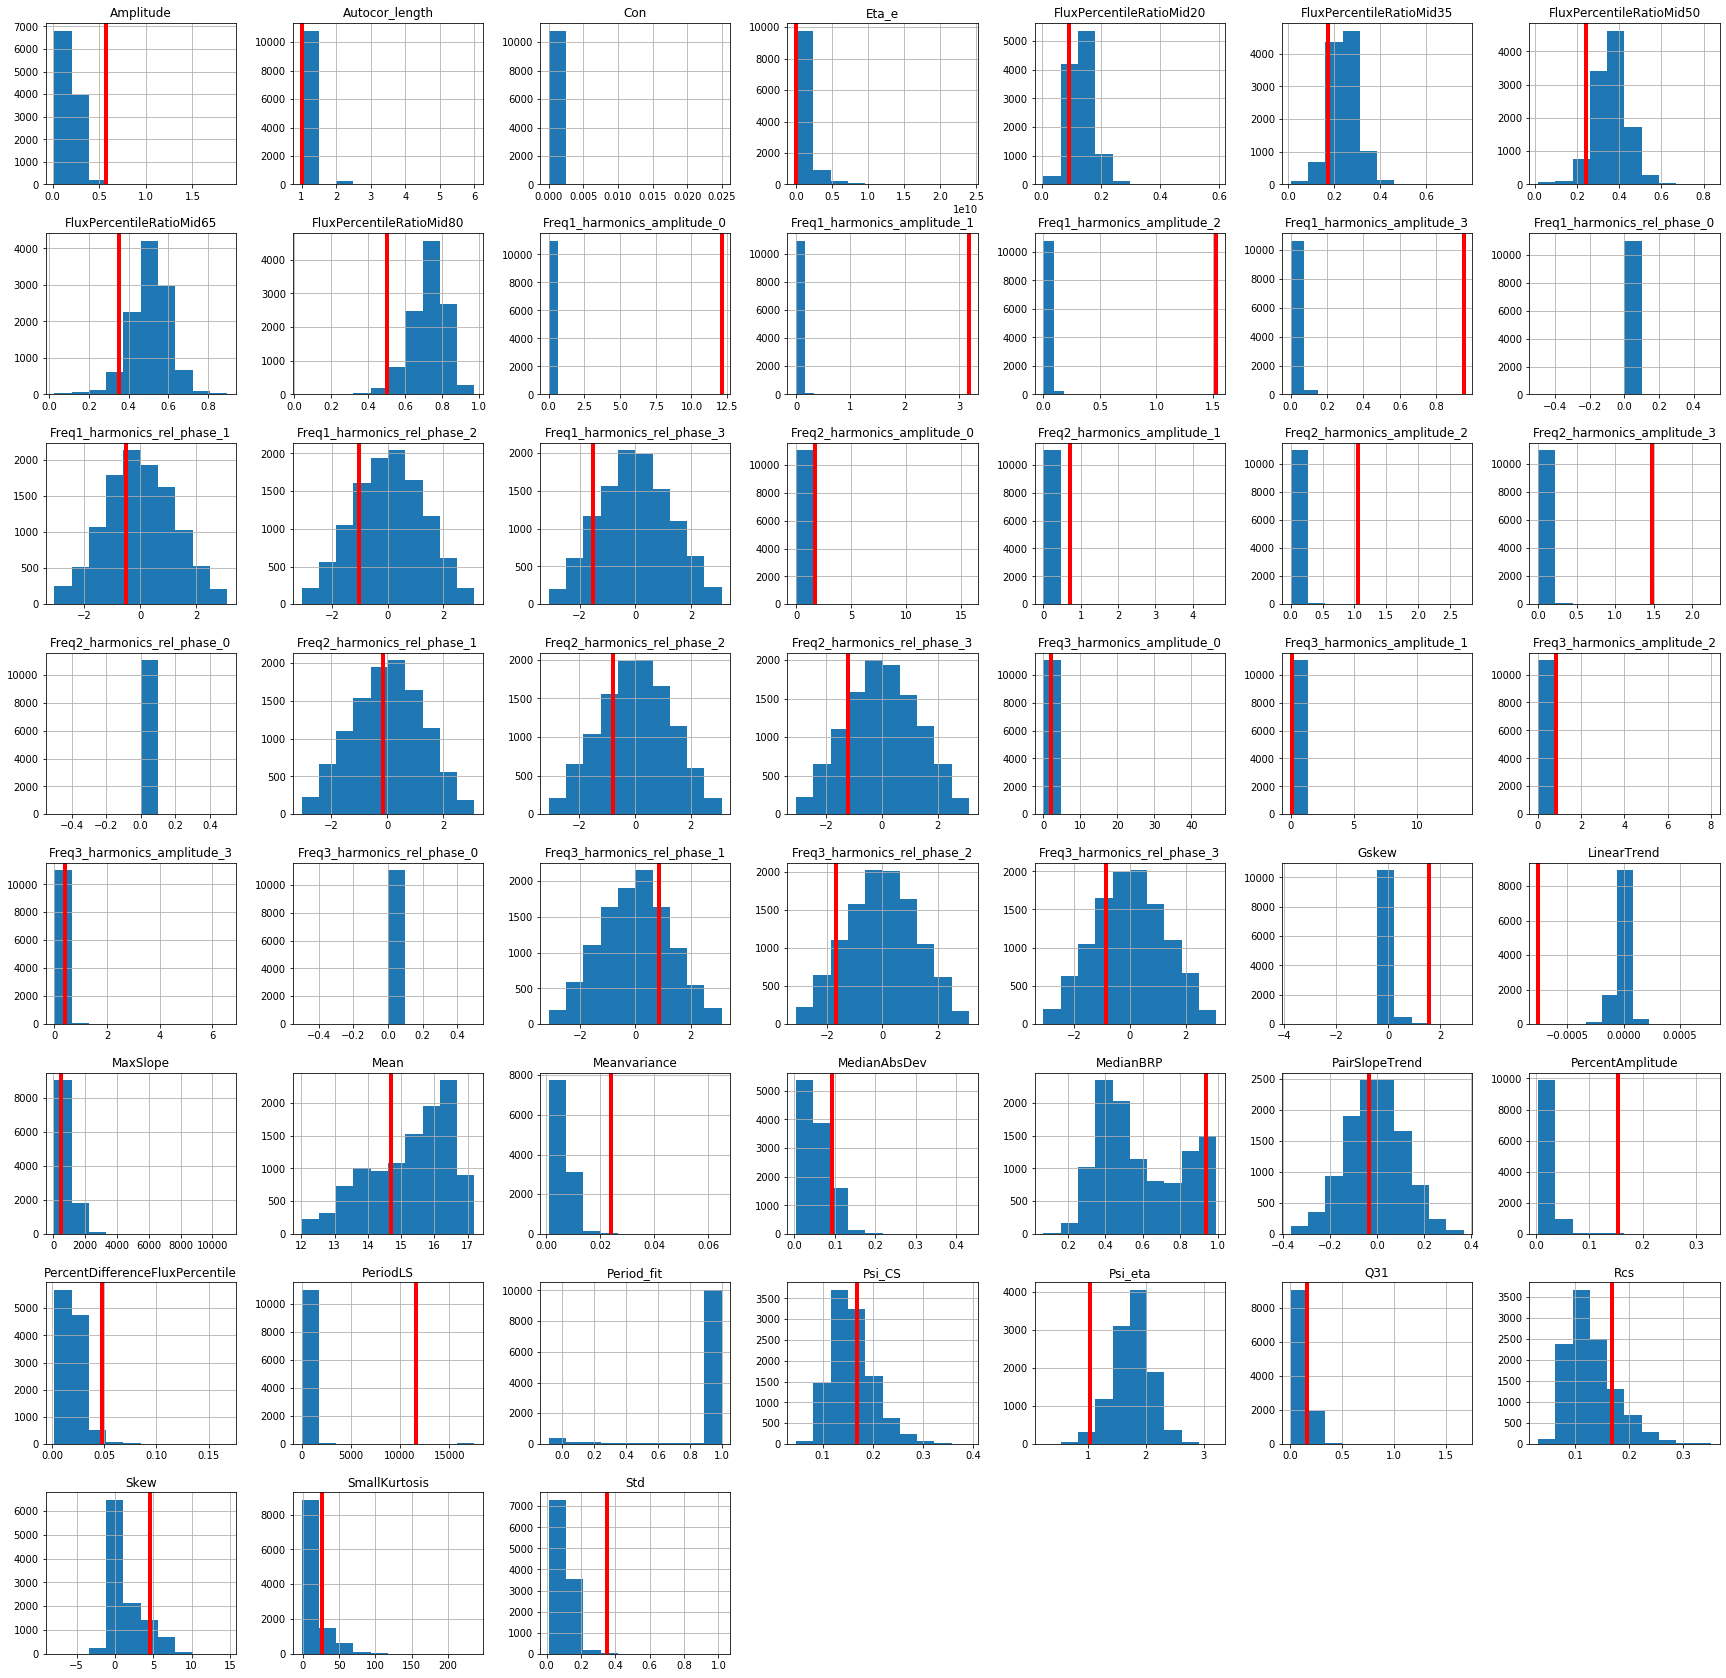

In [4]:
plot_in_tile("b356")

## Tile b216

### Cone search sample: 1662

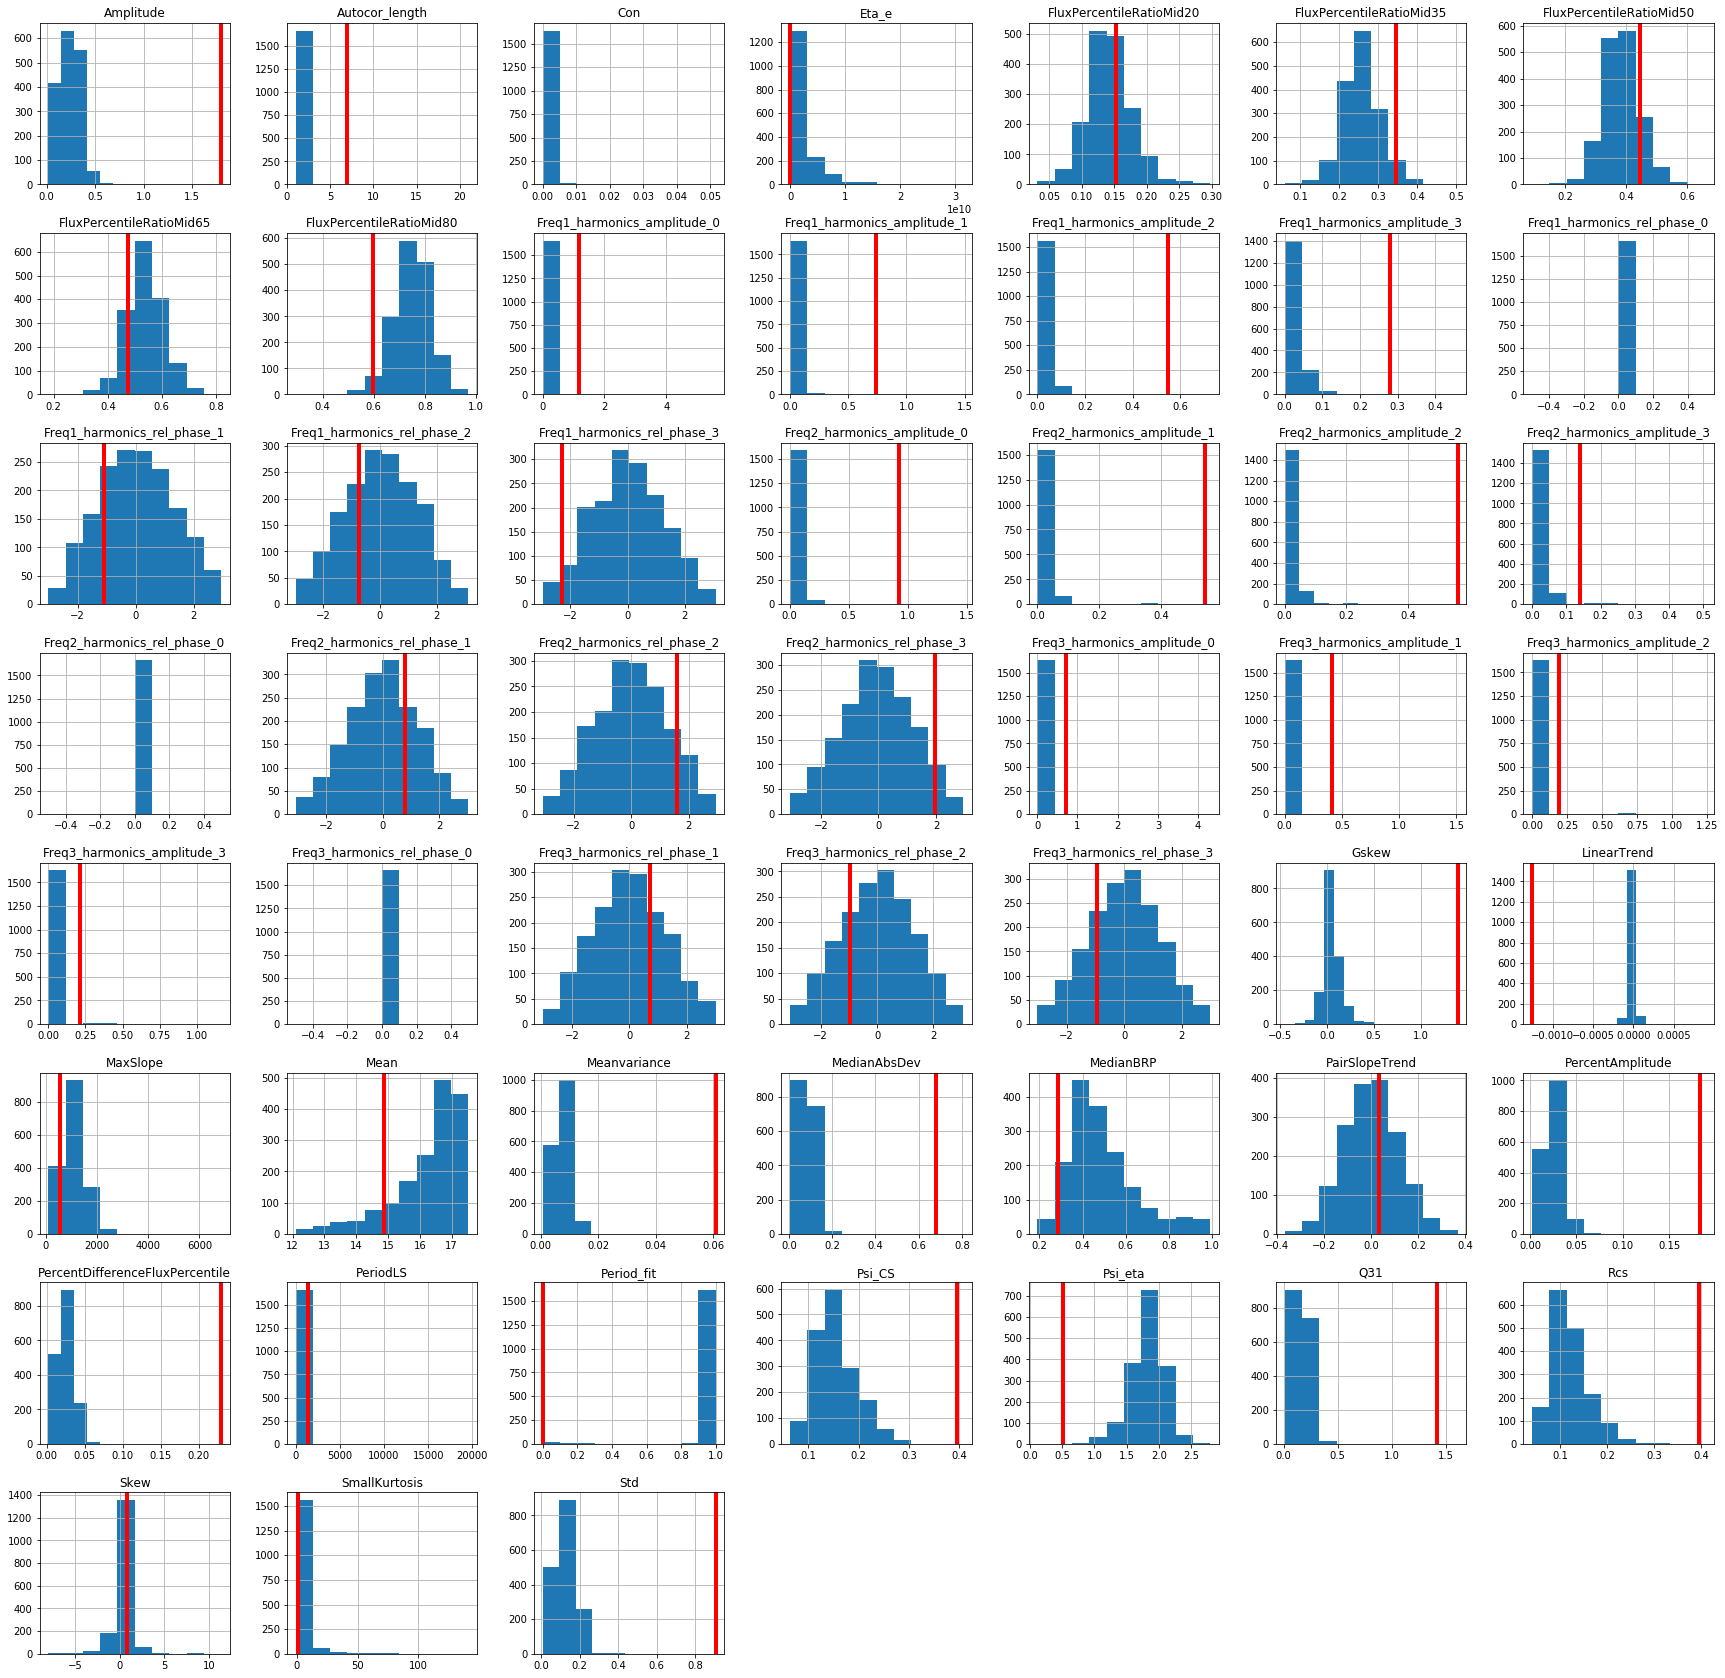

In [5]:
plot_in_tile("b216")

## Tile b206

### Cone search sample: 1531

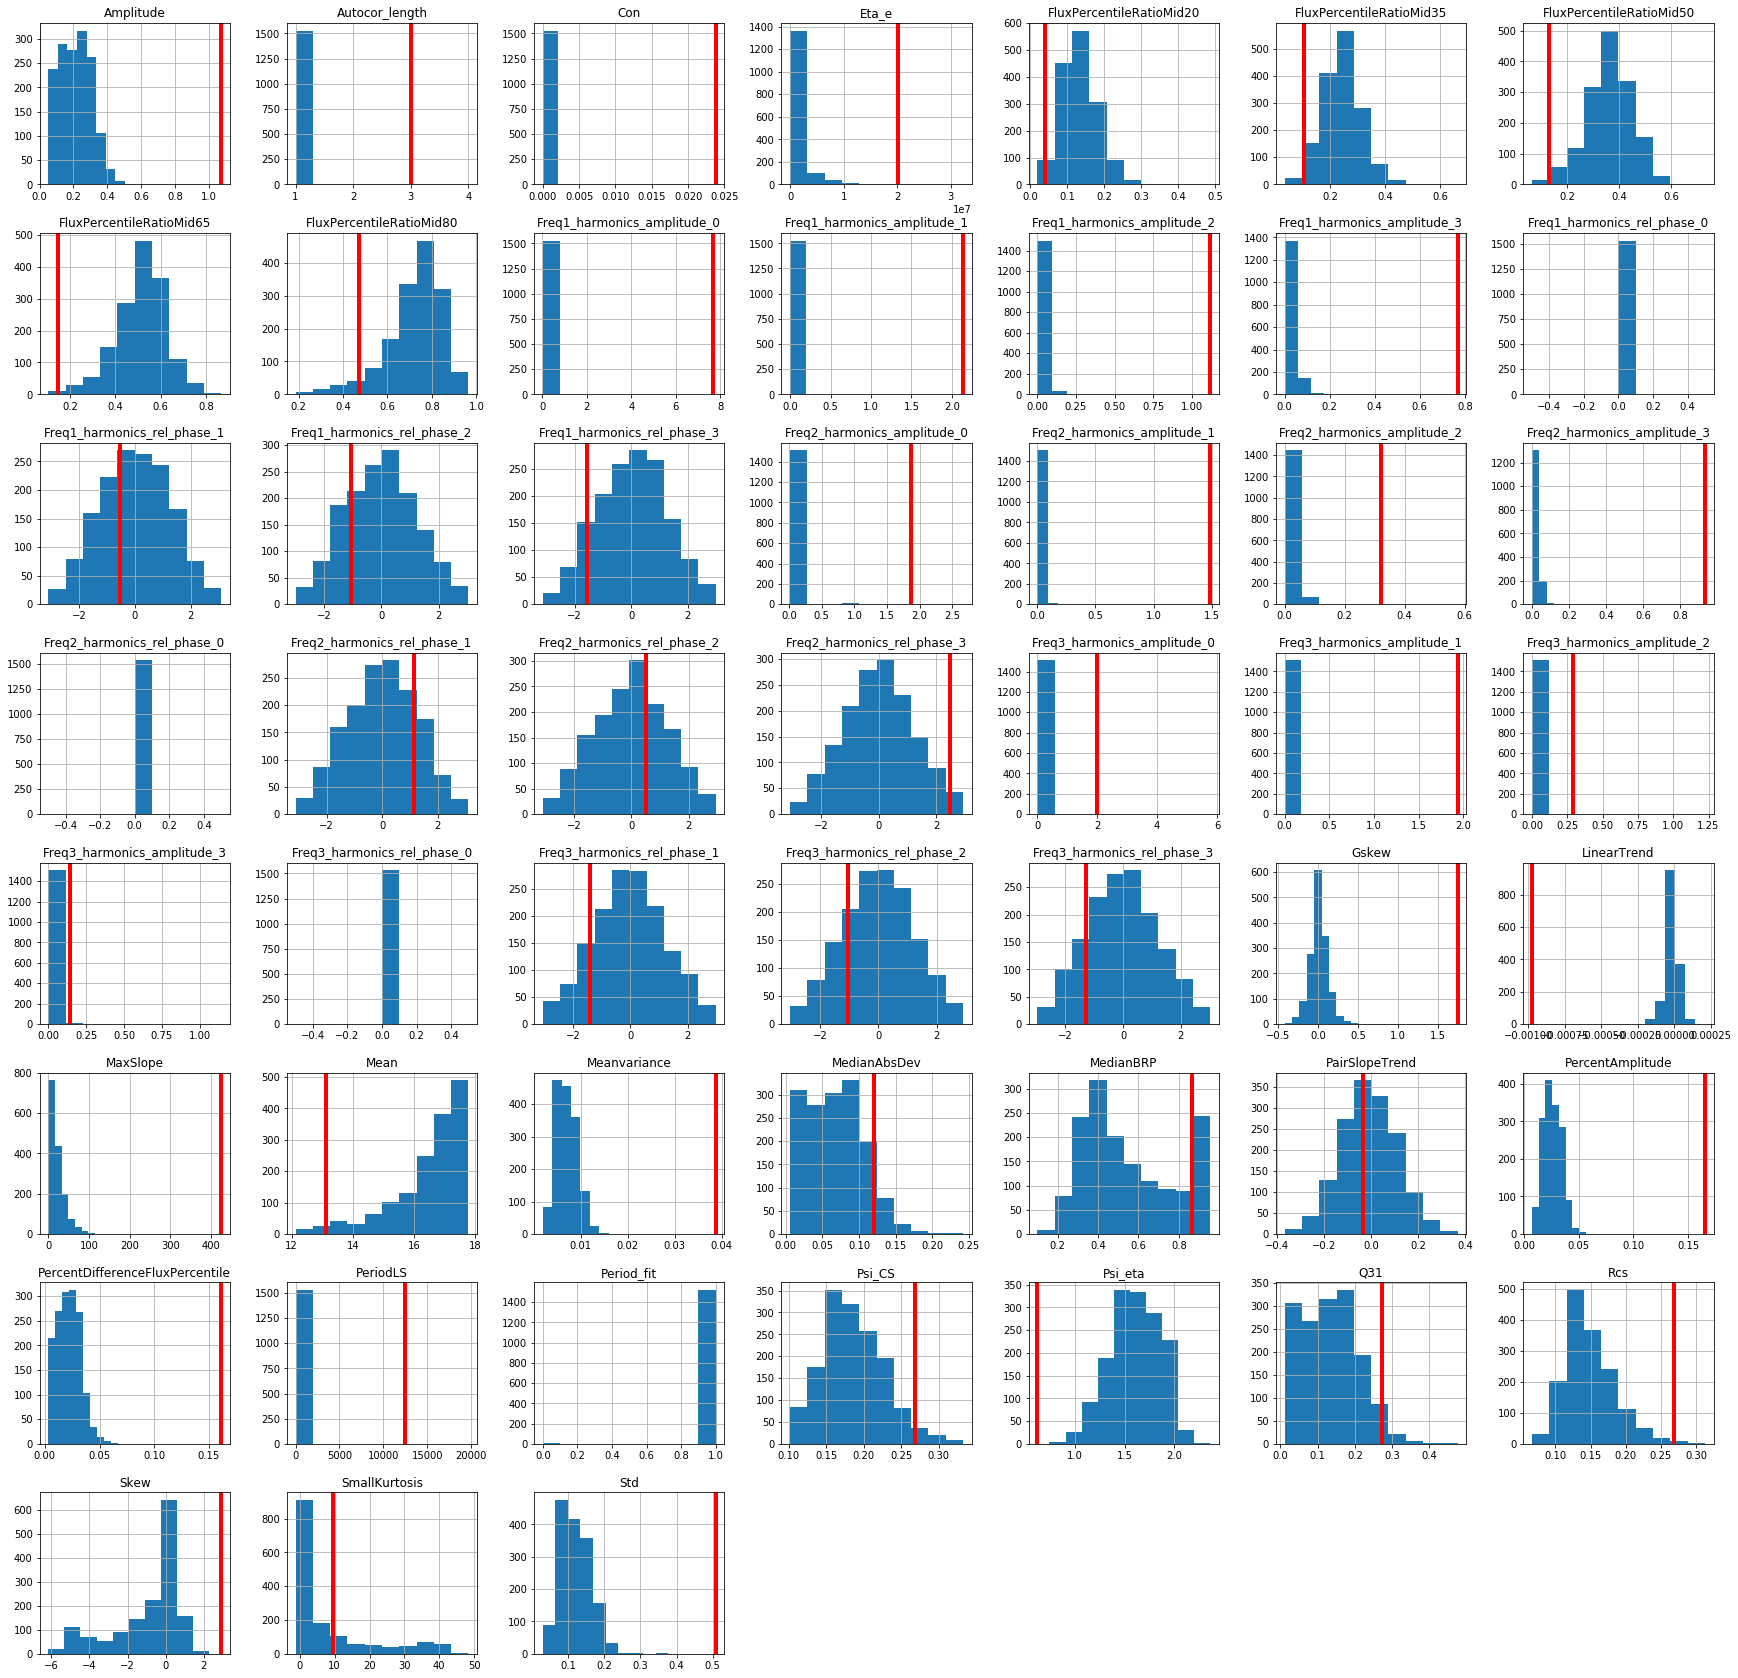

In [6]:
plot_in_tile("b206")

## Tile b360

### Cone search sample: 40142

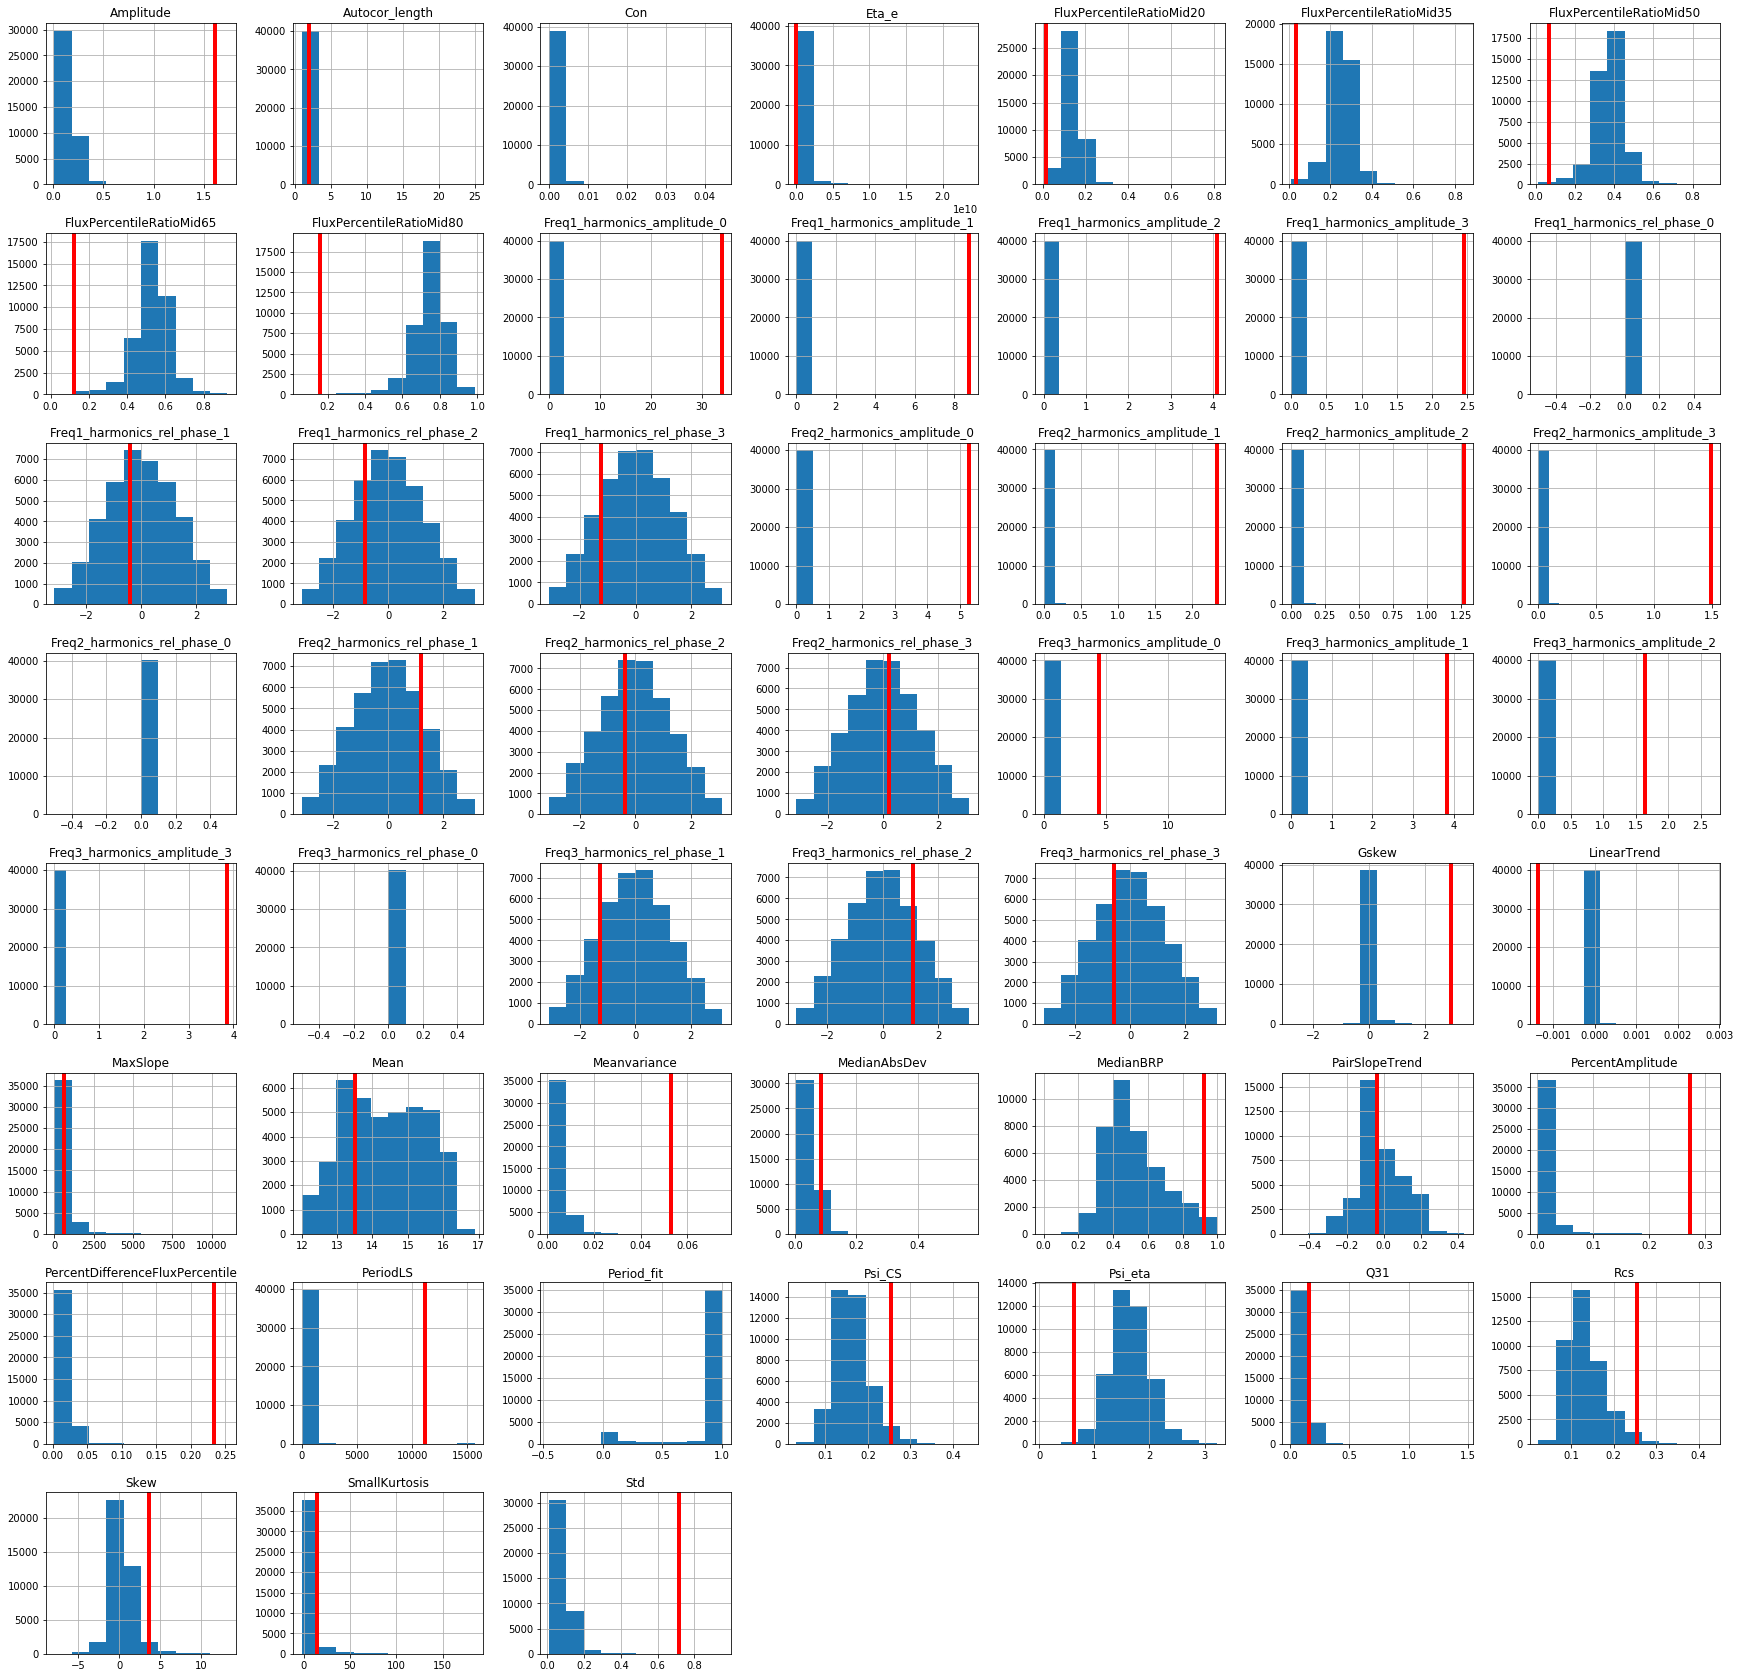

In [7]:
plot_in_tile("b360")